In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
!pip install -U tensorflow==2.0.0
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import tensorflow
import os

        
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

ERROR: Could not find a version that satisfies the requirement tensorflow==2.0.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0)
ERROR: No matching distribution found for tensorflow==2.0.0


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image  import ImageDataGenerator
from tensorflow.keras.utils  import  img_to_array,load_img
import matplotlib.pyplot as plt
from glob import glob

In [6]:
train_path = "/kaggle/input/fruits/fruits-360/Training/"
test_path = "/kaggle/input/fruits/fruits-360/Test/"

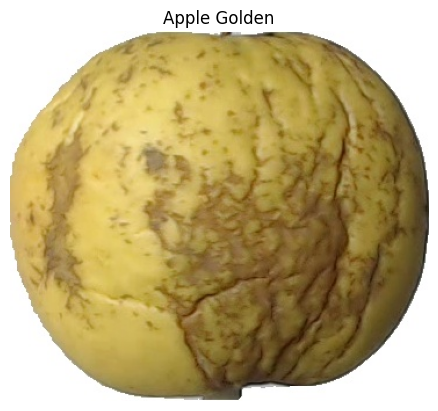

In [7]:
img = load_img("/kaggle/input/fruits/fruits-360-original-size/fruits-360-original-size/Training/apple_golden_1/r0_100.jpg")
plt.imshow(img)
plt.title("Apple Golden")
plt.axis("off")
plt.show()

In [8]:
shape_of_image = img_to_array(img)
print(shape_of_image.shape)

(319, 361, 3)


In [9]:
classes = glob("/kaggle/input/fruits/fruits-360-original-size/fruits-360-original-size/Training"+ "/*")
number_of_class = len(classes)
print("Number of class : " , number_of_class)

Number of class :  24


In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                   shear_range = 0.3,
                   horizontal_flip = True,
                   zoom_range = 0.3)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory("/kaggle/input/fruits/fruits-360-original-size/fruits-360-original-size/Training",
                                                   target_size = shape_of_image.shape[:2],
                                                   batch_size = 32,
                                                   color_mode = 'rgb',
                                                   class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory("/kaggle/input/fruits/fruits-360-original-size/fruits-360-original-size/Test",
                                                   target_size = shape_of_image.shape[:2],
                                                   batch_size = 32,
                                                   color_mode = 'rgb',
                                                   class_mode = 'categorical')

Found 6231 images belonging to 24 classes.
Found 3110 images belonging to 24 classes.


In [11]:
model = Sequential()

In [12]:
model.add(Conv2D(32,(3,3),activation = 'relu', input_shape = shape_of_image.shape))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),activation = 'relu', input_shape = shape_of_image.shape))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3),activation = 'relu', input_shape = shape_of_image.shape))
model.add(MaxPooling2D())

In [13]:
model.add(Flatten())
model.add(Dense(1024,activation='relu'))

In [14]:
model.add(Dropout(0.5))
model.add(Dense(number_of_class,activation = 'softmax'))

In [15]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [16]:
batch_size = 32
number_of_batch = 1600 // batch_size

In [ ]:
hist = model.fit_generator(
    generator = train_generator,
    steps_per_epoch = number_of_batch,
    epochs = 100,
    validation_data = test_generator,
    validation_steps = 800 // batch_size
                   )

/tmp/ipykernel_34/2683505415.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/100
50/50 [==============================] - 268s 5s/step - loss: 2.3729 - accuracy: 0.2350 - val_loss: 1.4752 - val_accuracy: 0.5638
Epoch 2/100
50/50 [==============================] - 265s 5s/step - loss: 1.5045 - accuracy: 0.4789 - val_loss: 0.7134 - val_accuracy: 0.7750
Epoch 3/100
50/50 [==============================] - 248s 5s/step - loss: 1.0931 - accuracy: 0.6300 - val_loss: 1.2203 - val_accuracy: 0.5362
Epoch 4/100
50/50 [==============================] - 245s 5s/step - loss: 0.8797 - accuracy: 0.7128 - val_loss: 0.3751 - val_accuracy: 0.8750
Epoch 5/100
50/50 [==============================] - 245s 5s/step - loss: 0.6153 - accuracy: 0.7901 - val_loss: 0.3448 - val_accuracy: 0.8763
Epoch 6/100
39/50 [======================>.......] - ETA: 48s - loss: 0.5438 - accuracy: 0.7981

In [ ]:
model.save_weights("trial.h5")

In [ ]:
print(hist.history.keys())
plt.plot(hist.history["loss"],label = "Train Loss")
plt.plot(hist.history["val_loss"],label = "Validaton Loss")
plt.legend()
plt.show()

In [ ]:
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy")
plt.plot(hist.history["val_accuracy"],label = "Validaton Accuracy")
plt.legend()
plt.show()

In [ ]:
import json
with open("traial.json","w") as f:
    json.dump(hist.history,f)

In [ ]:
import codecs 
with codecs.open("traial.json","r",encoding = "utf-8") as f:
    h = json.loads(f.read())